<a href="https://colab.research.google.com/github/adas754/image2text/blob/main/OCR_Content_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDF and Images Content Extraction for Large Language Models

In [ ]:
#!pip install -U pypdfium2

In [3]:
!pip install pypdfium2

In [4]:
import pypdfium2 as pdfium
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [5]:
def convert_pdf_to_images(file_path, scale=300/72):

    pdf_file = pdfium.PdfDocument(file_path)
    page_indices = [i for i in range(len(pdf_file))]

    renderer = pdf_file.render(
        pdfium.PdfBitmap.to_pil,
        page_indices = page_indices,
        scale = scale,
    )

    list_final_images = []

    for i, image in zip(page_indices, renderer):

        image_byte_array = BytesIO()
        image.save(image_byte_array, format='jpeg', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append(dict({i:image_byte_array}))

    return list_final_images

In [6]:
def display_images(list_dict_final_images):

    all_images = [list(data.values())[0] for data in list_dict_final_images]

    for index, image_bytes in enumerate(all_images):

        image = Image.open(BytesIO(image_bytes))
        figure = plt.figure(figsize = (image.width / 100, image.height / 100))

        plt.title(f"----- Page Number {index+1} -----")
        plt.imshow(image)
        plt.axis("off")
        plt.show()

In [7]:
convert_pdf_to_images = convert_pdf_to_images('/content/sec_page_5.pdf')

In [ ]:
#convert_pdf_to_images

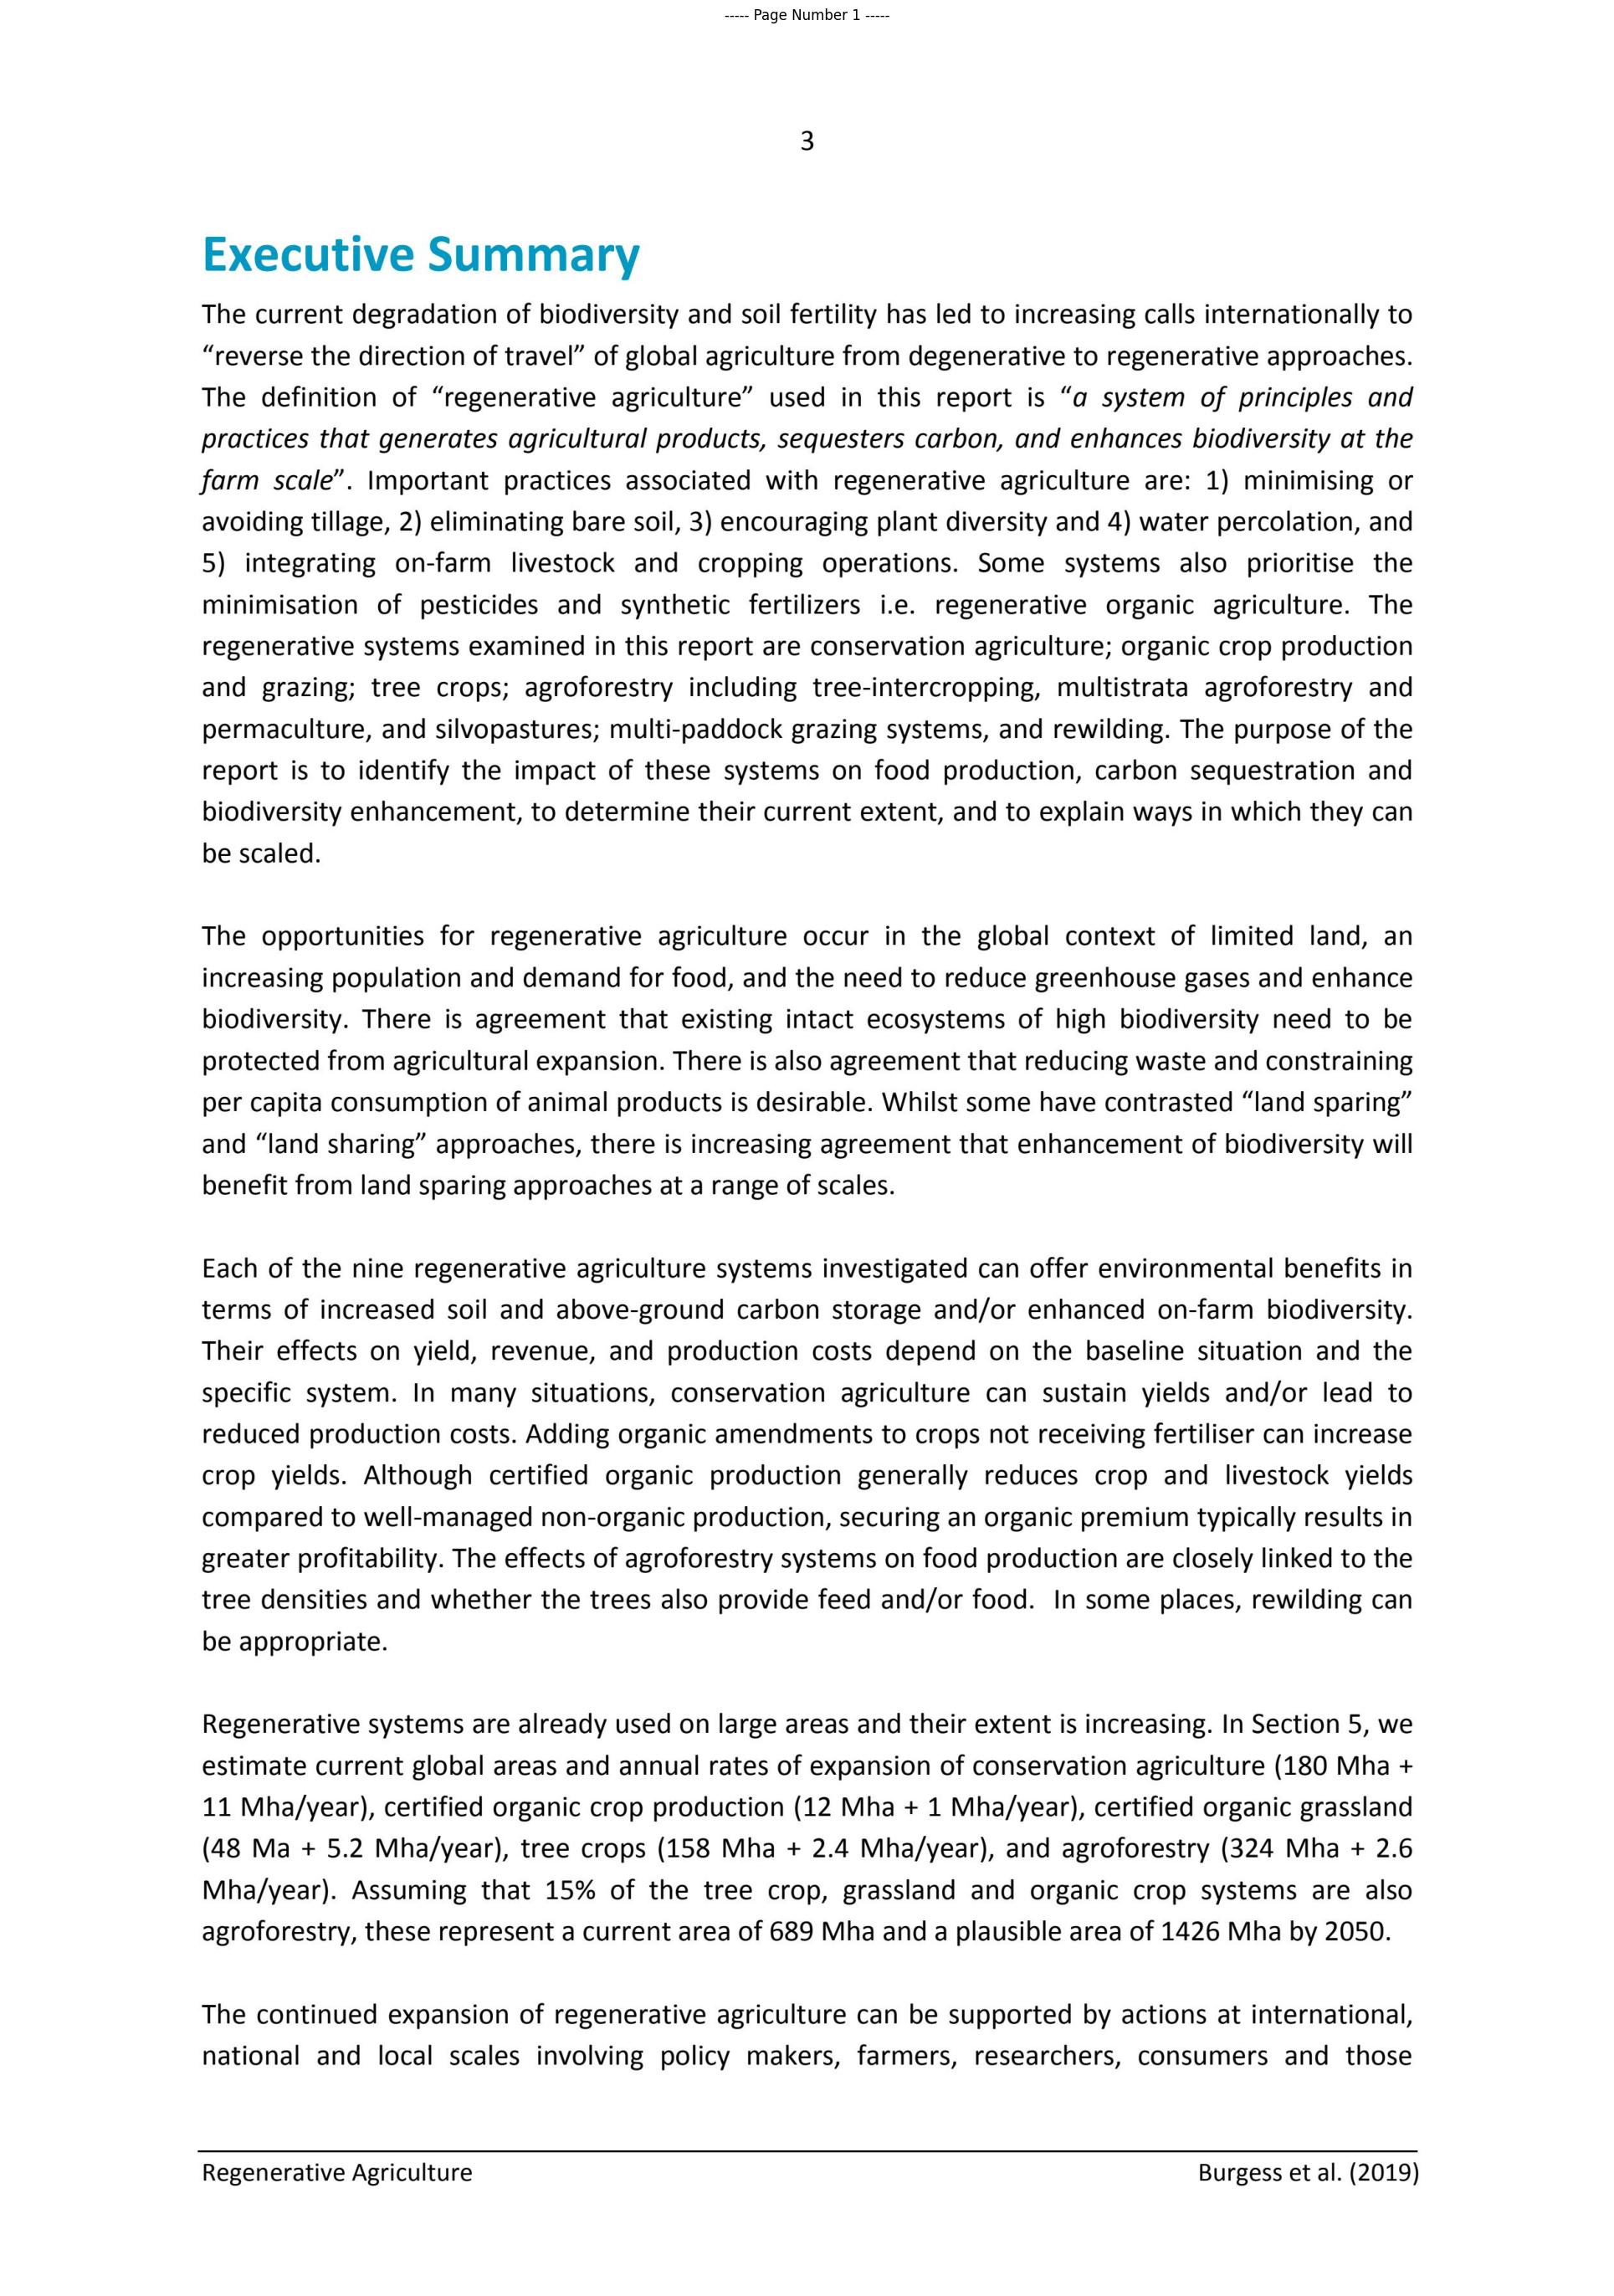

In [8]:
display_images(convert_pdf_to_images)

## PyTesseract

In [9]:
!pip install pytesseract

In [10]:
from pytesseract import image_to_string

In [11]:
def extract_text_with_pytesseract(list_dict_final_images):

    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []

    for index, image_bytes in enumerate(image_list):

        image = Image.open(BytesIO(image_bytes))
        raw_text = str(image_to_string(image))
        image_content.append(raw_text)

    return "\n".join(image_content)

In [15]:
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,881 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [13]:
!sudo apt-get update
!sudo apt-get install libleptonica-dev tesseract-ocr tesseract-ocr-dev libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,120 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,462 kB]
Fetched 4,816 kB in 2s (2,362 kB/s)
Reading package lists... 

In [16]:
text_with_pytesseract = extract_text_with_pytesseract(convert_pdf_to_images)

print(text_with_pytesseract)

Executive Summary

The current degradation of biodiversity and soil fertility has led to increasing calls internationally to
“reverse the direction of travel” of global agriculture from degenerative to regenerative approaches.
The definition of “regenerative agriculture” used in this report is “a system of principles and
practices that generates agricultural products, sequesters carbon, and enhances biodiversity at the
farm scale”. \mportant practices associated with regenerative agriculture are: 1) minimising or
avoiding tillage, 2) eliminating bare soil, 3) encouraging plant diversity and 4) water percolation, and
5) integrating on-farm livestock and cropping operations. Some systems also prioritise the
minimisation of pesticides and synthetic fertilizers i.e. regenerative organic agriculture. The
regenerative systems examined in this report are conservation agriculture; organic crop production
and grazing; tree crops; agroforestry including tree-intercropping, multistrata agroforest

## EasyOCR

In [17]:
!pip install easyocr

from easyocr import Reader

# Load model for the English language
language_reader = Reader(["en"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 29.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [18]:
def extract_text_with_easyocr(list_dict_final_images):

    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []

    for index, image_bytes in enumerate(image_list):

        image = Image.open(BytesIO(image_bytes))
        raw_text = language_reader.readtext(image)
        raw_text = "\n".join([res[1] for res in raw_text])

        image_content.append(raw_text)

    return "\n".join(image_content)

In [19]:
text_with_easy_ocr = extract_text_with_easyocr(convert_pdf_to_images)
print(text_with_easy_ocr)

3
Executive Summary
The current degradation of biodiversity and soil fertility has led to increasing calls internationally to
"reverse the direction of travel" of global agriculture from degenerative to regenerative approaches
The definition of "regenerative agriculture"
used in
this report is
(( 
a system of principles and
practices that generates agricultural products, sequesters carbon, and enhances biodiversity at the
farm scale" .
Important practices associated
with regenerative agriculture
are: 1) minimising
or
avoiding tillage, 2) eliminating bare soil, 3) encouraging plant diversity and 4) water percolation, and
5)
integrating
on-farm
livestock
and
cropping  operations
Some  systems
also   prioritise
the
minimisation
of  pesticides
and  synthetic   fertilizers
i.e:
regenerative   organic   agriculture:
The
regenerative systems examined in this report are conservation agriculture; organic crop production
and grazing;
tree crops; agroforestry including tree-intercropping,
multist

## PyPDF

In [20]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.8 MB/s eta 0:00:00


In [21]:
from PyPDF2 import PdfReader

In [22]:
def extract_text_with_pyPDF(PDF_File):

    pdf_reader = PdfReader(PDF_File)

    raw_text = ''

    for i, page in enumerate(pdf_reader.pages):

        text = page.extract_text()
        if text:
            raw_text += text

    return raw_text

In [24]:
text_with_pyPDF = extract_text_with_pyPDF("/content/sec_page_5.pdf")
print(text_with_pyPDF)

3 
 
Regenerative Agriculture  Burgess et al. (2 019)  Executive Summary  
The current degradation of biodiversity and soil fertility  has led to increasing calls internationally to 
“reverse the direction of travel” of global agriculture from degenerative to regenerati ve approaches.  
The definition of “regenerative a griculture” used in this report is “ a system of principles and 
practices that generates  agricultural products, sequesters carbon, and enhances  biodiversity at the 
farm scale ”. Important practices associated w ith regenerative agriculture are : 1) minimising  or 
avoid ing tillage, 2) eliminating bare soil, 3) encouraging  plant diversity  and 4) water percolation , and 
5) integrating  on-farm livestock and cropping operations. Some systems also prioritise the 
minimisat ion of pesticides and synthetic fertilizers  i.e. regenerative organic agriculture. The 
regenerative systems  examined in this report are  conserv ation agriculture ; organic crop production 
and

## LangChain

In [25]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.7/973.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [3]:
!pip install -U langchain-community

In [4]:
!pip install unstructured

In [27]:
from langchain.document_loaders.image import UnstructuredImageLoader

def extract_text_with_langchain_image(list_dict_final_images):

    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []

    for index, image_bytes in enumerate(image_list):

        image = Image.open(BytesIO(image_bytes))
        loader = UnstructuredImageLoader(image)
        data = loader.load()
        raw_text = data[index].page_content

        image_content.append(raw_text)

    return "\n".join(image_content)

In [28]:
!pip install unstructured[pdf]

In [32]:
!pip install pdfminer

In [1]:
!pip3 install pdfminer.six

In [33]:
!pip install pypdfium2

In [1]:
!pip install pypdfium2==0.7.0

In [3]:
!pip install pypdfium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pypdfium: filename=pypdfium-0.0.15-py3-none-any.whl size=7838766 sha256=1709fac2369f9c76baccb3618e1fba2a75cbe347805f17147fd84d50fafab13b
  Stored in directory: /root/.cache/pip/wheels/dd/e1/66/ad41b24aac482885e38a262d4af914f5c36bbc72a4fbeaded1
Successfully built pypdfium


In [5]:
!pip uninstall -e /usr/local/lib/python3.10/site-packages/pypdfium2


Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: -e


In [7]:
!pip install pdf2image Pillow langchain


In [10]:
!sudo apt-get install poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 0s (604 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 122098 

In [11]:
import os
from io import BytesIO
from pdf2image import convert_from_path
from PIL import Image
from langchain.document_loaders.image import UnstructuredImageLoader

def convert_pdf_to_images(file_path, dpi=300):
    images = convert_from_path(file_path, dpi=dpi)
    list_final_images = []

    for i, image in enumerate(images):
        image_byte_array = BytesIO()
        image.save(image_byte_array, format='JPEG', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append({i: image_byte_array})

    return list_final_images

def extract_text_with_langchain_image(list_dict_final_images):
    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []

    for index, image_bytes in enumerate(image_list):
        image = Image.open(BytesIO(image_bytes))

        # Save the image to a temporary file
        temp_image_path = f'temp_image_{index}.jpeg'
        image.save(temp_image_path)

        # Load the image using UnstructuredImageLoader
        loader = UnstructuredImageLoader(temp_image_path)
        data = loader.load()
        raw_text = data[0].page_content  # Assuming each image corresponds to one page

        image_content.append(raw_text)

        # Remove the temporary image file
        os.remove(temp_image_path)

    return "\n".join(image_content)

# Example usage
file_path = '/content/sec_page_5.pdf'  # Provide the path to your PDF file
list_final_images = convert_pdf_to_images(file_path)
text_with_langchain_image = extract_text_with_langchain_image(list_final_images)
print(text_with_langchain_image)


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

Executive Summary

The current degradation of biodiversity and soil fertility has led to increasing calls internationally to |’ “reverse the direction of travel” of global agriculture from degenerative to regenerative approaches. The definition of “regenerative agriculture” used in this report is “a system of principles and practices that generates agricultural products, sequesters carbon, and enhances biodiversity at the farm scale”. |Important practices associated with regenerative agriculture are: 1) minimising or avoiding tillage, 2) eliminating bare soil, 3) encouraging plant diversity and 4) water percolation, and 5) integrating on-farm livestock and cropping operations. Some systems also prioritise the minimisation of pesticides and synthetic fertilizers i.e. regenerative organic agriculture. The regenerative systems examined in this report are conservation agriculture; organic crop production and grazing; tree crops; agroforestry including tree-intercropping, multistrata agrofo

In [23]:
from langchain.document_loaders import UnstructuredFileLoader

def extract_text_with_langchain_pdf(pdf_file):

    loader = UnstructuredFileLoader(pdf_file)
    documents = loader.load()
    pdf_pages_content = '\n'.join(doc.page_content for doc in documents)

    return pdf_pages_content

In [24]:
text_with_langchain_files = extract_text_with_langchain_pdf("/content/sec_page_5.pdf")
print(text_with_langchain_files)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


3

Executive Summary The current degradation of biodiversity and soil fertility has led to increasing calls internationally to “reverse the direction of travel” of global agriculture from degenerative to regenerative approaches. The definition of “regenerative agriculture” used in this report is “a system of principles and practices that generates agricultural products, sequesters carbon, and enhances biodiversity at the farm scale”. Important practices associated with regenerative agriculture are: 1) minimising or avoiding tillage, 2) eliminating bare soil, 3) encouraging plant diversity and 4) water percolation, and 5) integrating on-farm livestock and cropping operations. Some systems also prioritise the minimisation of pesticides and synthetic fertilizers i.e. regenerative organic agriculture. The regenerative systems examined in this report are conservation agriculture; organic crop production and grazing; tree crops; agroforestry including tree-intercropping, multistrata agrofore